<a href="https://colab.research.google.com/github/Ahtesham-Ibne-Mostafa/Artificial_Intelligence/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
"id=21201342"

x=1+3+4+2
print((x%5)+1)

1


In [235]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

In [236]:
df = pd.read_csv('/content/drive/MyDrive/Copy of Housing Price.csv')

In [237]:
df.shape

(545, 13)

In [238]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,NaN,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,NaN,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [239]:
df.isnull().sum()


,0
price,0
area,9
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [240]:
# 1. Remove Null Values
df = df.dropna()
df = df.reset_index(drop=True)

In [241]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [242]:
df.duplicated().sum()

0

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             536 non-null    int64  
 1   area              536 non-null    float64
 2   bedrooms          536 non-null    int64  
 3   bathrooms         536 non-null    int64  
 4   stories           536 non-null    int64  
 5   mainroad          536 non-null    object 
 6   guestroom         536 non-null    object 
 7   basement          536 non-null    object 
 8   hotwaterheating   536 non-null    object 
 9   airconditioning   536 non-null    object 
 10  parking           536 non-null    int64  
 11  prefarea          536 non-null    object 
 12  furnishingstatus  536 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 54.6+ KB


In [244]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.360000e+02,536.000000,536.000000,536.000000,536.000000,536.000000
mean,4.671533e+06,5087.304104,2.951493,1.272388,1.796642,0.675373
std,1.730925e+06,2089.231412,0.732093,0.481880,0.863414,0.851074
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3562.500000,2.000000,1.000000,1.000000,0.000000
50%,4.305000e+06,4505.000000,3.000000,1.000000,2.000000,0.000000
75%,5.600000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,15600.000000,6.000000,4.000000,4.000000,3.000000


In [245]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [246]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']    #from the Description HP.txt file from the dataset's drive link

In [247]:
df[binary_cols].value_counts()

mainroad  guestroom  basement  hotwaterheating  airconditioning  prefarea
yes       no         no        no               no               no          150
                                                yes              no           62
                     yes       no               no               no           43
no        no         no        no               no               no           42
yes       no         no        no               no               yes          32
                     yes       no               no               yes          21
          yes        yes       no               no               no           20
          no         yes       no               yes              no           19
          yes        yes       no               no               yes          18
          no         no        no               yes              yes          17
          yes        yes       no               yes              yes          14
                     no        no               yes              no           14
          no         yes       no               yes              yes          12
                     no        yes              no               no           10
no        no         yes       no               no               no           10
yes       yes        yes       no               yes              no            9
no        no         no        no               yes              no            7
yes       yes        no        no               no               no            5
no        no         yes       no               yes              no            5
yes       no         yes       yes              no               no            4
no        yes        yes       no               no               no            3
yes       yes        no        no               yes              yes           2
          no         no        yes              no               yes           2
no        yes        yes       no               yes              no            2
                     no        no               no               no            2
          no         yes       yes              no               no            2
                     no        yes              no               no            2
yes       yes        yes       yes              no               no            2
          no         no        yes              yes              yes           1
          yes        no        no               no               yes           1
                               yes              no               no            1
no        no         yes       no               no               yes           1
                     no        no               yes              yes           1
Name: count, dtype: int64

In [248]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [249]:
for i in binary_cols:
  df[i] = encoder.fit_transform(df[i])

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             536 non-null    int64  
 1   area              536 non-null    float64
 2   bedrooms          536 non-null    int64  
 3   bathrooms         536 non-null    int64  
 4   stories           536 non-null    int64  
 5   mainroad          536 non-null    int64  
 6   guestroom         536 non-null    int64  
 7   basement          536 non-null    int64  
 8   hotwaterheating   536 non-null    int64  
 9   airconditioning   536 non-null    int64  
 10  parking           536 non-null    int64  
 11  prefarea          536 non-null    int64  
 12  furnishingstatus  536 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 54.6+ KB


In [251]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960.0,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960.0,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,9310000,6550.0,4,2,2,1,0,0,0,1,1,1,semi-furnished
4,9240000,3500.0,4,2,2,1,0,0,1,0,2,0,furnished


In [252]:
df[binary_cols].value_counts()

mainroad  guestroom  basement  hotwaterheating  airconditioning  prefarea
1         0          0         0                0                0           150
                                                1                0            62
                     1         0                0                0            43
0         0          0         0                0                0            42
1         0          0         0                0                1            32
                     1         0                0                1            21
          1          1         0                0                0            20
          0          1         0                1                0            19
          1          1         0                0                1            18
          0          0         0                1                1            17
          1          1         0                1                1            14
                     0         0                1                0            14
          0          1         0                1                1            12
                     0         1                0                0            10
0         0          1         0                0                0            10
1         1          1         0                1                0             9
0         0          0         0                1                0             7
1         1          0         0                0                0             5
0         0          1         0                1                0             5
1         0          1         1                0                0             4
0         1          1         0                0                0             3
1         1          0         0                1                1             2
          0          0         1                0                1             2
0         1          1         0                1                0             2
                     0         0                0                0             2
          0          1         1                0                0             2
                     0         1                0                0             2
1         1          1         1                0                0             2
          0          0         1                1                1             1
          1          0         0                0                1             1
                               1                0                0             1
0         0          1         0                0                1             1
                     0         0                1                1             1
Name: count, dtype: int64

In [253]:
df['furnishingstatus'].value_counts()

,count
furnishingstatus,
semi-furnished,224
unfurnished,176
furnished,136


In [254]:
# Using OneHotEncoder for 'furnishingstatus' with drop='first' to avoid multicollinearity
encoder2 = OneHotEncoder(sparse=False, drop='first')
encoded_furnishing = pd.DataFrame(encoder2.fit_transform(df[['furnishingstatus']]), columns=encoder2.get_feature_names_out(['furnishingstatus']))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [255]:
df = df.drop([furnishing_col], axis=1)
df = df.join(encoded_furnishing)

In [256]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420.0,4,2,3,1,0,0,0,1,2,1,0.0,0.0
1,12250000,8960.0,4,4,4,1,0,0,0,1,3,0,0.0,0.0
2,12250000,9960.0,3,2,2,1,0,1,0,0,2,1,1.0,0.0
3,9310000,6550.0,4,2,2,1,0,0,0,1,1,1,1.0,0.0
4,9240000,3500.0,4,2,2,1,0,0,1,0,2,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,1820000,3000.0,2,1,1,1,0,1,0,0,2,0,0.0,1.0
532,1767150,2400.0,3,1,1,0,0,0,0,0,0,0,1.0,0.0
533,1750000,3620.0,2,1,1,1,0,0,0,0,0,0,0.0,1.0
534,1750000,2910.0,3,1,1,0,0,0,0,0,0,0,0.0,0.0


In [257]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [258]:
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [259]:
corr_matrix = df.corr()

print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                                    price      area  bedrooms  bathrooms  \
price                            1.000000  0.513133  0.342946   0.498598   
area                             0.513133  1.000000  0.118208   0.159484   
bedrooms                         0.342946  0.118208  1.000000   0.360723   
bathrooms                        0.498598  0.159484  0.360723   1.000000   
stories                          0.433029  0.076078  0.410182   0.326561   
mainroad                         0.301417  0.290585 -0.019891   0.032858   
guestroom                        0.246996  0.147814  0.070802   0.129637   
basement                         0.166293  0.036878  0.091071   0.102773   
hotwaterheating                  0.089732 -0.006973  0.039027   0.046146   
airconditioning                  0.442612  0.214105  0.154748   0.185167   
parking                          0.352418  0.351616  0.124677   0.161320   
prefarea                         0.308523  0.225097  0.072504   0.04

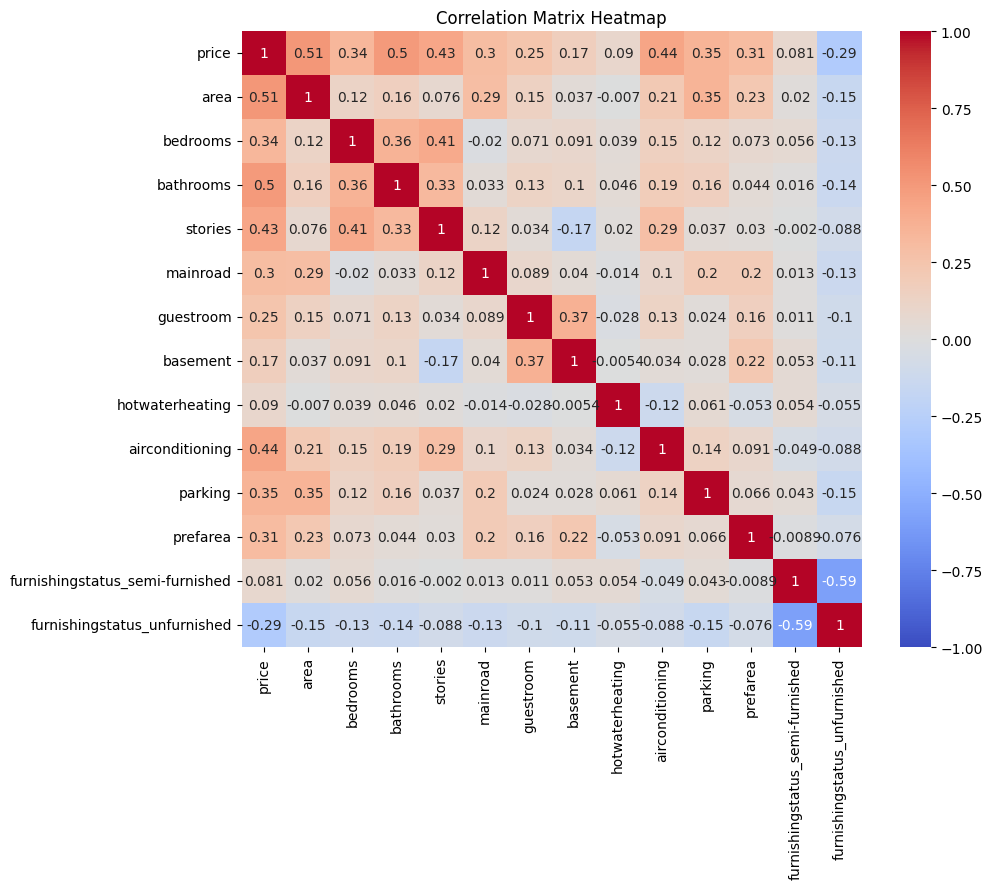

In [260]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [261]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [262]:
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [263]:

print(f"Features to drop due to high correlation: {to_drop}")


Features to drop due to high correlation: []


In [264]:
target='price'

In [265]:
X= df.loc[:,df.columns != target]

X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.117576,1.433543,1.511355,1.395023,1,0,0,0,1,1.557872,1,0.0,0.0
1,1.855378,1.433543,5.665645,2.554297,1,0,0,0,1,2.733955,0,0.0,0.0
2,2.334470,0.066320,1.511355,0.235748,1,0,1,0,0,1.557872,1,1.0,0.0
3,0.700766,1.433543,1.511355,0.235748,1,0,0,0,1,0.381788,1,1.0,0.0
4,-0.760465,1.433543,1.511355,0.235748,1,0,0,1,0,1.557872,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,-1.000011,-1.300902,-0.565789,-0.923527,1,0,1,0,0,1.557872,0,0.0,1.0
532,-1.287466,0.066320,-0.565789,-0.923527,0,0,0,0,0,-0.794295,0,1.0,0.0
533,-0.702974,-1.300902,-0.565789,-0.923527,1,0,0,0,0,-0.794295,0,0.0,1.0
534,-1.043129,0.066320,-0.565789,-0.923527,0,0,0,0,0,-0.794295,0,0.0,0.0


In [266]:
Y = df[target]
Y

,price
0,4.989544
1,4.382366
2,4.382366
3,2.682265
4,2.641787
...,...
531,-1.648943
532,-1.679504
533,-1.689421
534,-1.689421


In [267]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [268]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)


In [269]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
}

In [270]:
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    print(f"{name}: Mean Squared Error: {mse:.2f}")

Linear Regression: Mean Squared Error: 0.45
Ridge Regression: Mean Squared Error: 0.45
Lasso Regression: Mean Squared Error: 1.31
Decision Tree: Mean Squared Error: 0.78
Random Forest: Mean Squared Error: 0.42
